# Mini Maze
### Group kamekazee
Rovick Anthony Pasamonte<br>
Zaj Kenneth Panes<br>
Maui Azryl Lomuntad<br>
Arvin Clark Lota

In [12]:
import heapq
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

### Helper functions for pathfinding algorithms

In [13]:
def get_neighbors(position, maze):
    row, col = position
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    neighbors = []
    for dr, dc in directions:
        r, c = row + dr, col + dc
        if 0 <= r < len(maze) and 0 <= c < len(maze[0]) and maze[r][c] != 1:
            neighbors.append((r, c))
    return neighbors

def reconstruct_path(parents, start, end):
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = parents[current]
    return path[::-1]  # Reverse the path to start from the beginning

def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

### Breadth First Search

In [14]:
def bfs(maze, start, end):
    queue = deque([start])
    visited = set([start])
    parents = {start: None}

    while queue:
        current = queue.popleft()

        if current == end:
            return reconstruct_path(parents, start, end)

        for neighbor in get_neighbors(current, maze):
            if neighbor not in visited:
                visited.add(neighbor)
                parents[neighbor] = current
                queue.append(neighbor)
    return None

### Depth First Search

In [15]:
def dfs(maze, start, end):
    stack = [start]
    visited = set([start])
    parents = {start: None}

    while stack:
        current = stack.pop()

        if current == end:
            return reconstruct_path(parents, start, end)

        for neighbor in get_neighbors(current, maze):
            if neighbor not in visited:
                visited.add(neighbor)
                parents[neighbor] = current
                stack.append(neighbor)
    return None


### Heuristic A* Algorithms

In [16]:
def a_star(maze, start, end):
    open_list = []
    heapq.heappush(open_list, (0, start))
    g_cost = {start: 0}
    parents = {start: None}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == end:
            return reconstruct_path(parents, start, end)

        for neighbor in get_neighbors(current, maze):
            tentative_g_cost = g_cost[current] + 1 

            if neighbor not in g_cost or tentative_g_cost < g_cost[neighbor]:
                g_cost[neighbor] = tentative_g_cost
                f_cost = tentative_g_cost + manhattan_distance(neighbor, end)
                heapq.heappush(open_list, (f_cost, neighbor))
                parents[neighbor] = current
    return None

In [17]:
def visualize_maze(maze, path=None, start=None, end=None, title="Maze"):
    maze = np.array([[1 if cell == 1 else 0 for cell in row] for row in maze])
    plt.figure(figsize=(6, 6))
    plt.imshow(maze, cmap='binary', origin='upper')

    # Highlight start and end points
    if start:
        plt.plot(start[1], start[0], 'go', label="Start")  # Green for start
    if end:
        plt.plot(end[1], end[0], 'bo', label="End")  # Blue for end

    # Plot the path
    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], marker='o', color='red', label="Path")  # Red for path

    plt.title(title)
    plt.grid(True)
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
    plt.legend()
    plt.show()

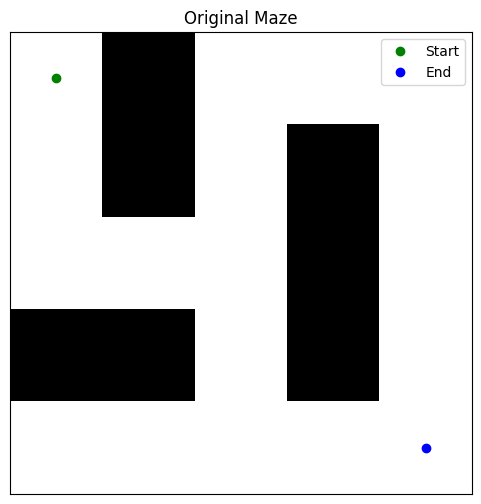

In [18]:
maze = [
    ["#", 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, "*"]
]
start = (0, 0)
end = (4, 4)

# Find paths using BFS, DFS, and A* algorithms
bfs_path = bfs(maze, start, end)
dfs_path = dfs(maze, start, end)
a_star_path = a_star(maze, start, end)

visualize_maze(maze, start=start, end=end, title="Original Maze")

### Visualize BFS path

BFS path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


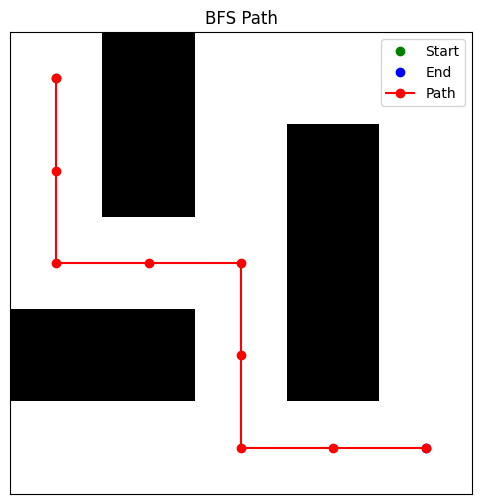

In [19]:
if bfs_path:
    print("BFS path:", bfs_path)
    visualize_maze(maze, path=bfs_path, start=start, end=end, title="BFS Path")
else:
    print("No BFS path found.")

### Visualize DFS path

DFS path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


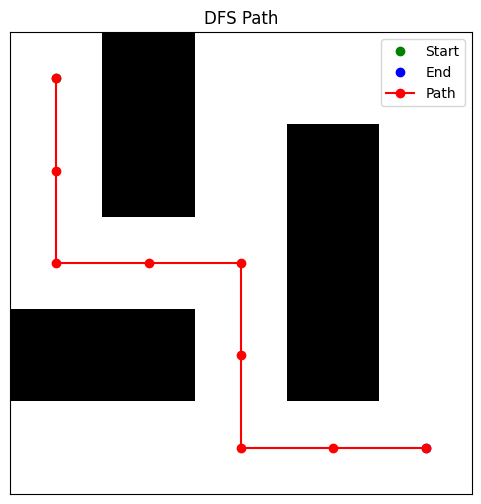

In [20]:
if dfs_path:
    print("DFS path:", dfs_path)
    visualize_maze(maze, path=dfs_path, start=start, end=end, title="DFS Path")
else:
    print("No DFS path found.")


### Visualize A* path

A* path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


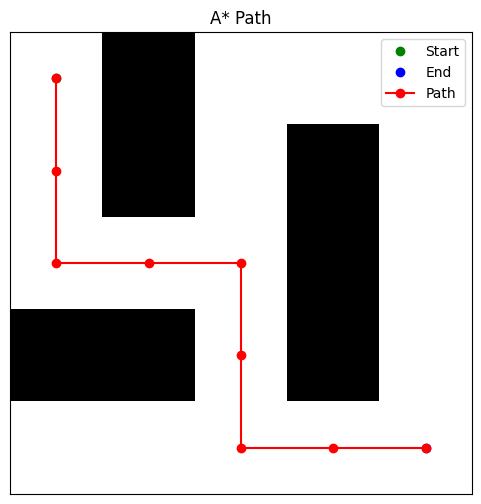

In [21]:
if a_star_path:
    print("A* path:", a_star_path)
    visualize_maze(maze, path=a_star_path, start=start, end=end, title="A* Path")
else:
    print("No A* path found.")